# ML Tutorial Day 18

## Principl Component Analysis

It is a technique which is used to reduce the dimensions in machine learning. When working on real life ML problems, we might have to deal with a large number of features (columns) and it won't be always possible to use all the columns to make predictions.

In such a scenario, we drop certain columns that have the weakest influence over the target variable. We do this to reduce the complexity of the problem while sacrifising little to no accuracy.



If we look at the following image, we can observe that for all the images the highlighted two cells are always black, thus, they do not bring in new information at all, and it would be beneficial to drop that column as it will reduce the number of features that we have to deal with.

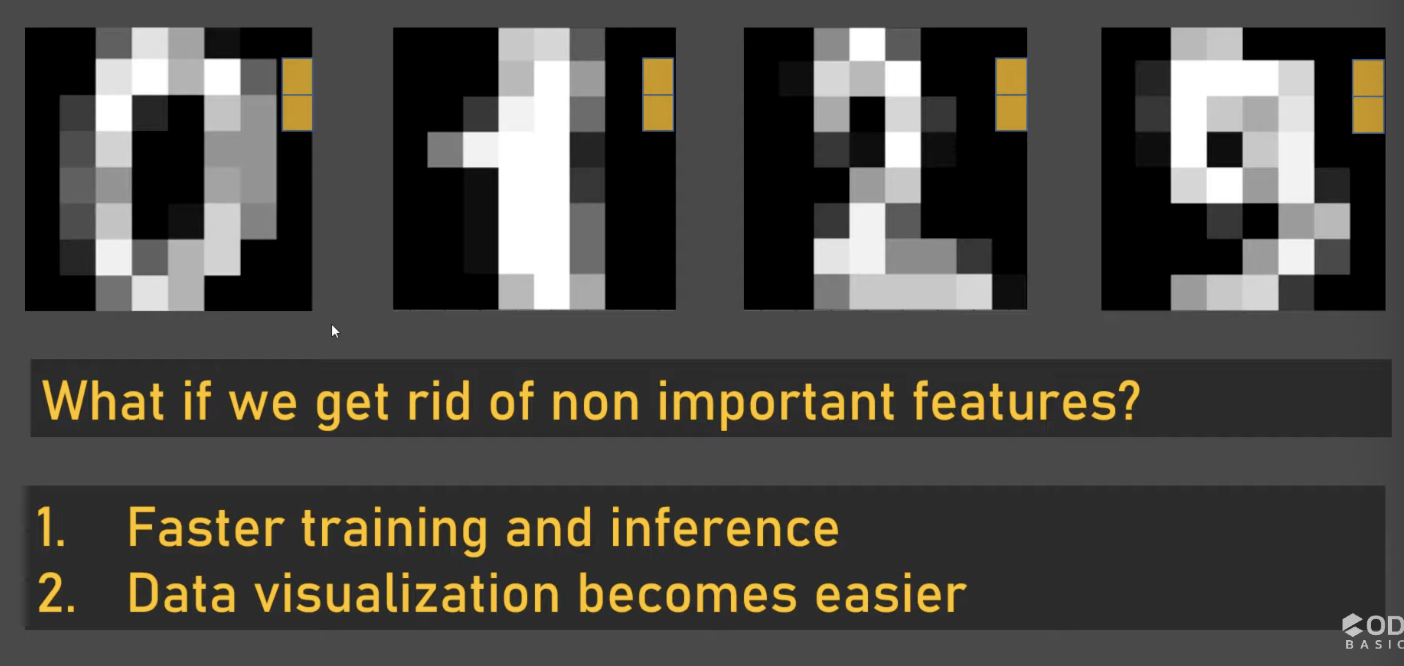

Having lower number of features is beneficial for the following reasons:
1. Faster training and inference: As the data that we have to take care of becomes less, the training as well as the prediction times also reduce, leading to an overall jump in performance.
2. Data visualization becomes easier: Plotting a dataset with 25 features would require us to plot the data in a 25-dimensional space, which is not possible for a human to comprehend. If we can bring that down to say 2 features that are the most important, then we can plot that on a 2-dimensional plot and it will be easier to see and understand.

For all this, PCA helps us. It is a process of identifying the most important features or principal components that has the most impact on the target variable.


We plot a scatter plot with the influence of 'central pixel' and 'corner pixel, on the final prediction. We can see that maximum variance is along the 'central pixel' while the 'corner pixel' is mostly the same. We can get rid of the 'corner pixel' and reduce the dimensionality of the data.

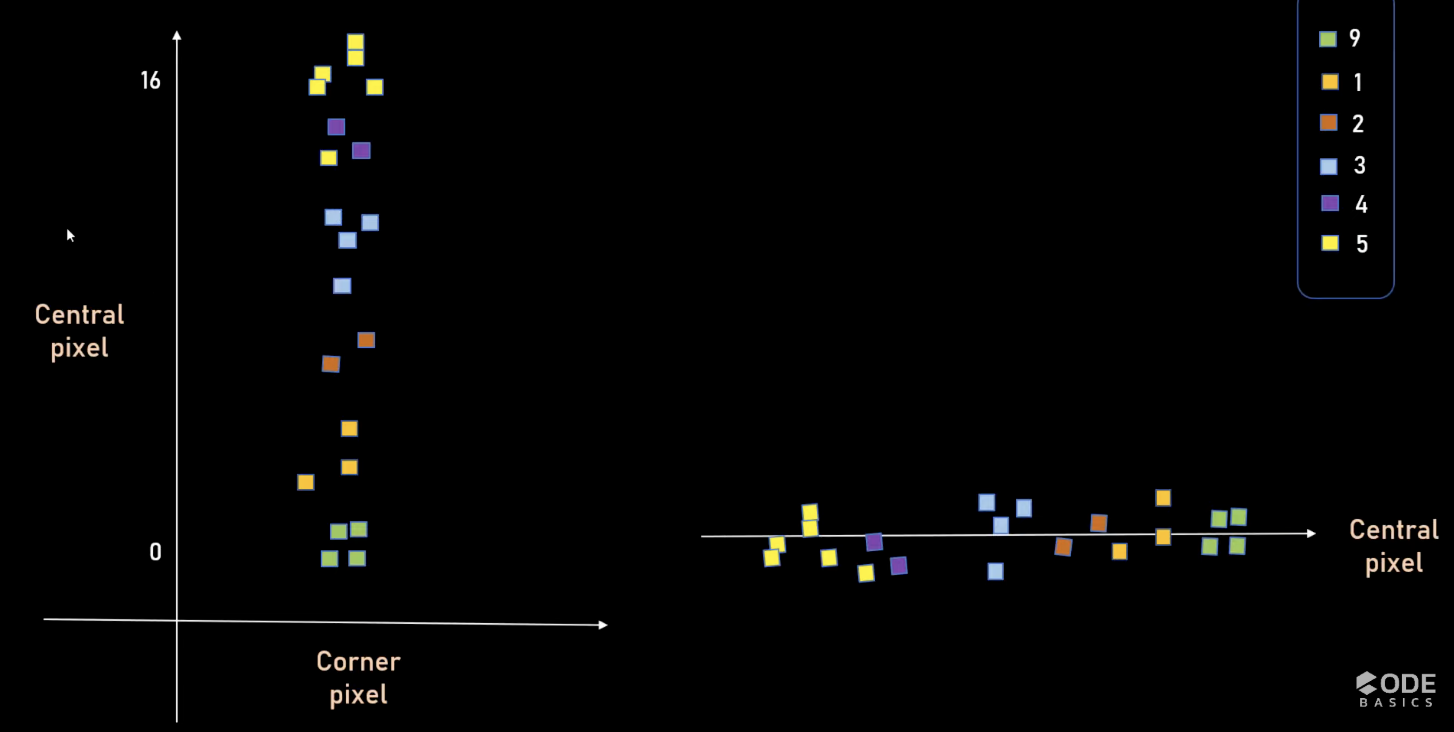

Similarly, for the iris dataset, we can draw a line through the data that covers the maximum variance in one direction, and a perpendicular line that captures the second most variance in that direction. These are called the principal components.

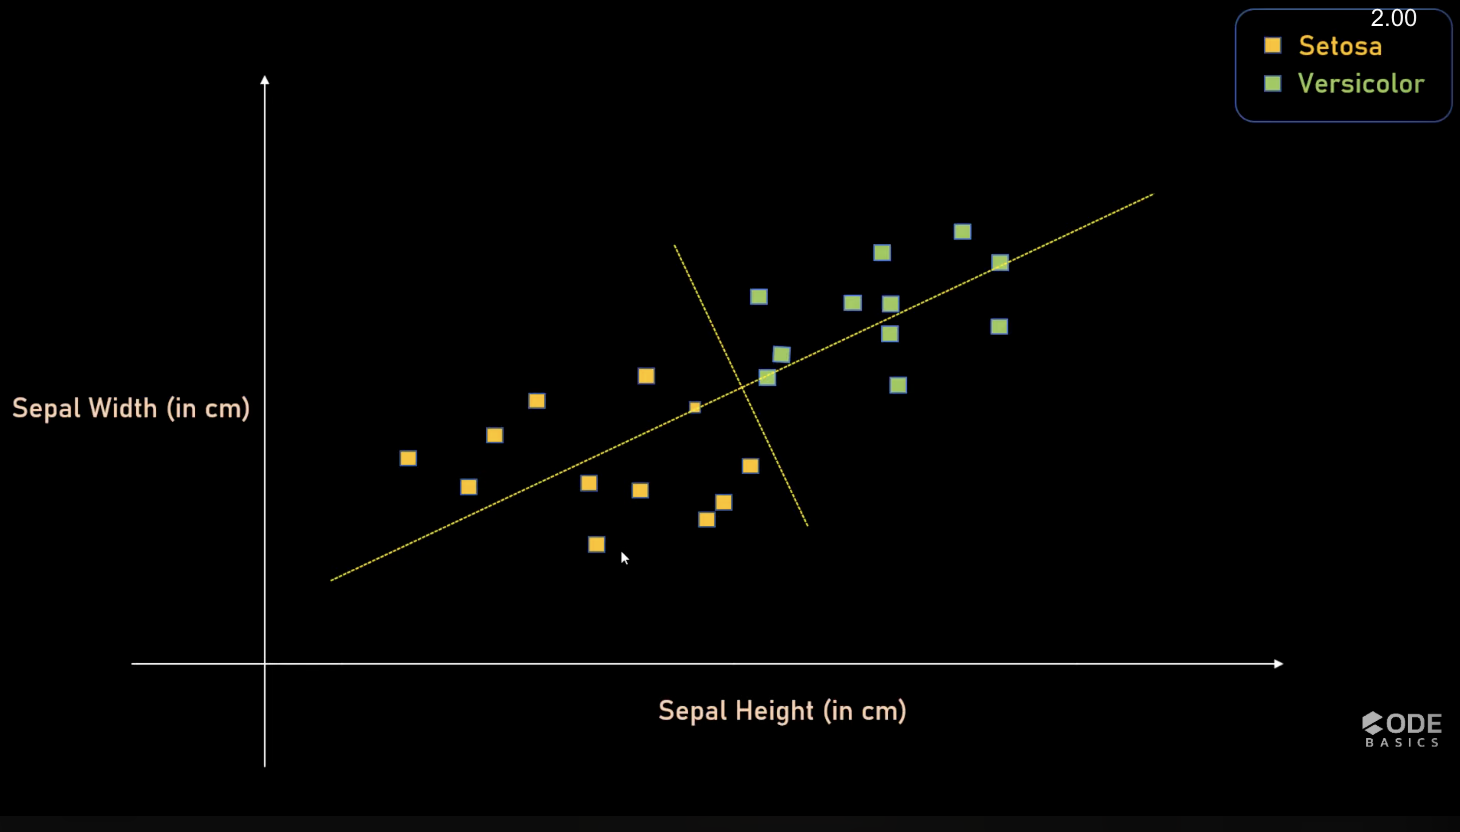

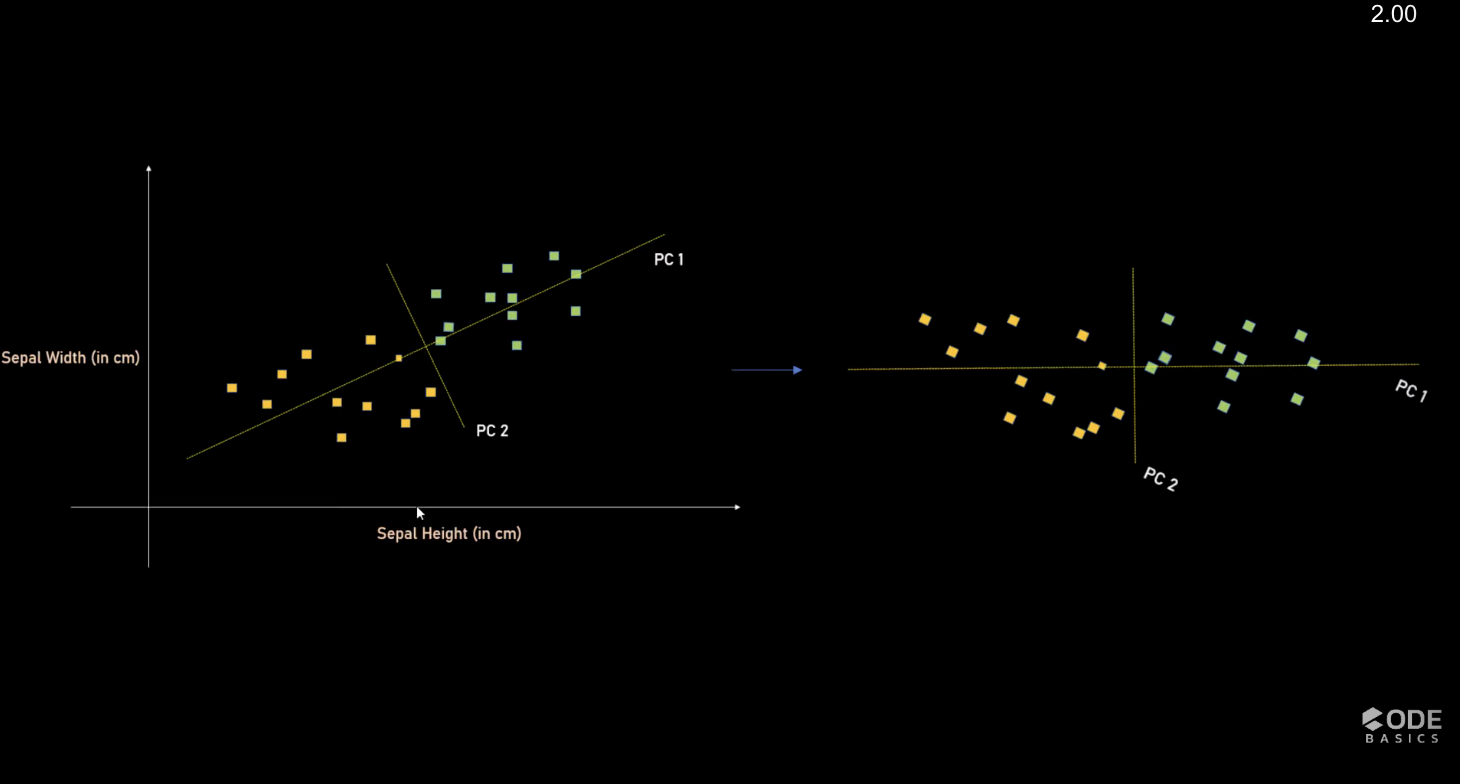

We can have 100 features and create 100 principal components in decending order of their impact on the target variable, and then pick out the most important 10 principal components, which, essentially mean that we are creating 10 new features that have the most information about the dataset. PCA helps us deal with the 'dimensionality curse'.

Things to keep in mind while using PCA:
1. Scale features before applying PCA
This is because if one feature is of the order of million-kms and the other is of the order millimeters, then the data will get skewed due to large difference between the scales.
2. Accuracy might drop
This is a tradeoff between complexity and tradeoff. It is obviously that all the features contribute, irrespective of the amount, towards the target and if we decide to drop some features, that means we are willingly throwing away information in favor of keeping the model simple.

In [86]:
# loading the dataset
import pandas as pd
from sklearn.datasets import load_digits

digit = load_digits()
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

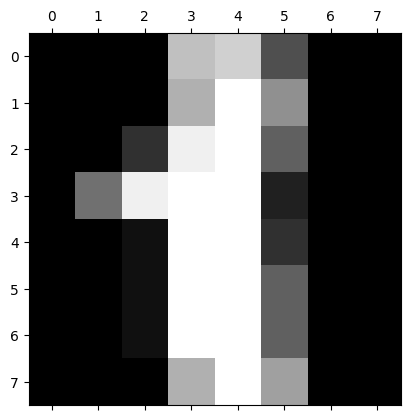

In [87]:
# visualising individual element of the array

# convert the np.array to an 8x8 2D array
digit.data[0].reshape(8,8)

# plotting the 2D array
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digit.data[1].reshape(8,8))
plt.show()

In [88]:
# digit.data is our dataset and digit.target is our classes. We are classifying the data into 10 classes

# creating a dataframe from the dataset
df = pd.DataFrame(digit.data, columns = digit.feature_names)
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000

In [89]:
# preparing features and target dataset

X = df
y = digit.target

In [90]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [91]:
# preparing the training and testing datasets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size = 0.2, random_state = 20)

y_train

array([0, 8, 8, ..., 5, 6, 9])

In [92]:
# training the model
from sklearn.linear_model import LogisticRegression as LR
logreg = LR()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

Now we will use PCA to reduce the dimensionality (columns) of the dataset

In [93]:
# importing PCA module
from sklearn.decomposition import PCA
# this means we will get new features that capture 95% information present in our dataset
pca = PCA(0.95)
# we can also provide n_components, that tell the algorithm to create n_component number of principal directions

# this gives us a new set of features that capture 95% of the information present in our initial data
X_pca = pca.fit_transform(X)

In [94]:
print(f"Initial dataset shape: {X.shape} \nPCA dataset shape: {X_pca.shape}")

Initial dataset shape: (1797, 64) 
PCA dataset shape: (1797, 29)


We can see that the PCA algorithm identified 29 new features that capture 95% of the data. The number of features came down from 64 to 29.

In [95]:
# this tells us how much each feature contributes to the overall information present in the new dataset
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [96]:
# number of features in the new dataset
pca.n_components_

np.int64(29)

We will use the transformed dataset to again train the model

In [97]:
# creating new train-test dataset
X_train_pca, X_test_pca, y_train, y_test = tts(X_pca, y, test_size = 0.2, random_state = 20)
X_train_pca

array([[  4.21813154, -22.6035796 ,   3.29212385, ...,  -1.05370184,
         -2.99367176,   1.70352506],
       [ -5.89913145,  -1.21935981,  -4.81435028, ...,   2.5356162 ,
          2.00936251,  -2.83573281],
       [  3.66639511,  10.91097162,  -6.99511508, ...,  -0.82165337,
          2.09623231,   2.77539929],
       ...,
       [ -6.21150699,  17.507828  ,  -6.22439908, ...,  -0.37153712,
         -1.95800724,  -2.47285969],
       [ 13.58522904, -10.93120308, -12.94141726, ...,   2.22470144,
         -0.08040081,  -0.0574858 ],
       [-19.65468104, -13.87022828,  -0.94649182, ...,   2.087219  ,
          0.37866062,  -1.66048265]])

In [98]:
# training the model
logreg = LR()
logreg.fit(X_train_pca, y_train)
logreg.score(X_test_pca, y_test)

0.9638888888888889

We see that we are getting the same accuracy despite droppnig more than half of the features.